In [47]:
library(stats) 
library(quantmod)
require(MASS)


# part one --  wage data

## (a)

### load wage data

In [48]:
Wages = read.csv(file = "wages.csv", header = TRUE)
wage = Wages$wage
age= Wages$age
experience = Wages$experience
n = length(wage)
t = 1: n


### four plots for wage

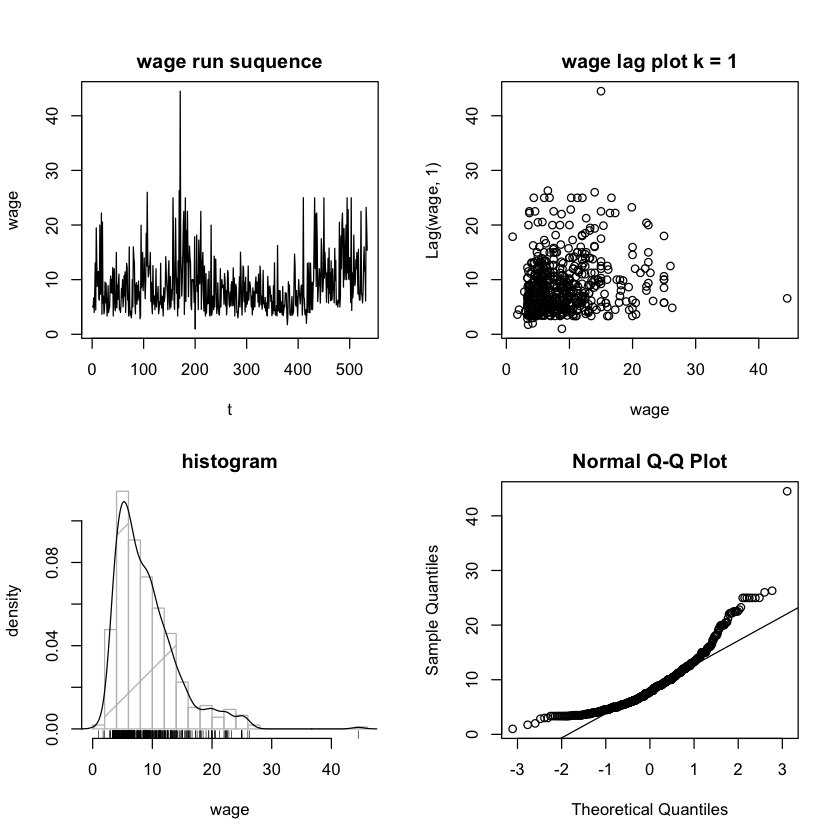

In [49]:

old_par = par(mfrow= c(2,2), oma = c(0, 0 , 2, 0), mar = c(5.1, 4.1, 2.1, 2.1))
plot(t, wage, type = 'l', main = "wage run suquence")
plot(wage, Lag(wage, 1), main = "wage lag plot k = 1")
truehist( wage, nbins = "FD", col= "grey", main = "histogram", density = TRUE,ylab = "density")
lines(density(wage, adjust = 0.9), lwd = 1)
rug(wage)
qqnorm(wage)
qqline(wage)


In [50]:
shapiro.test(wage) # normality test


	Shapiro-Wilk normality test

data:  wage
W = 0.8673, p-value < 2.2e-16


### four plot for age

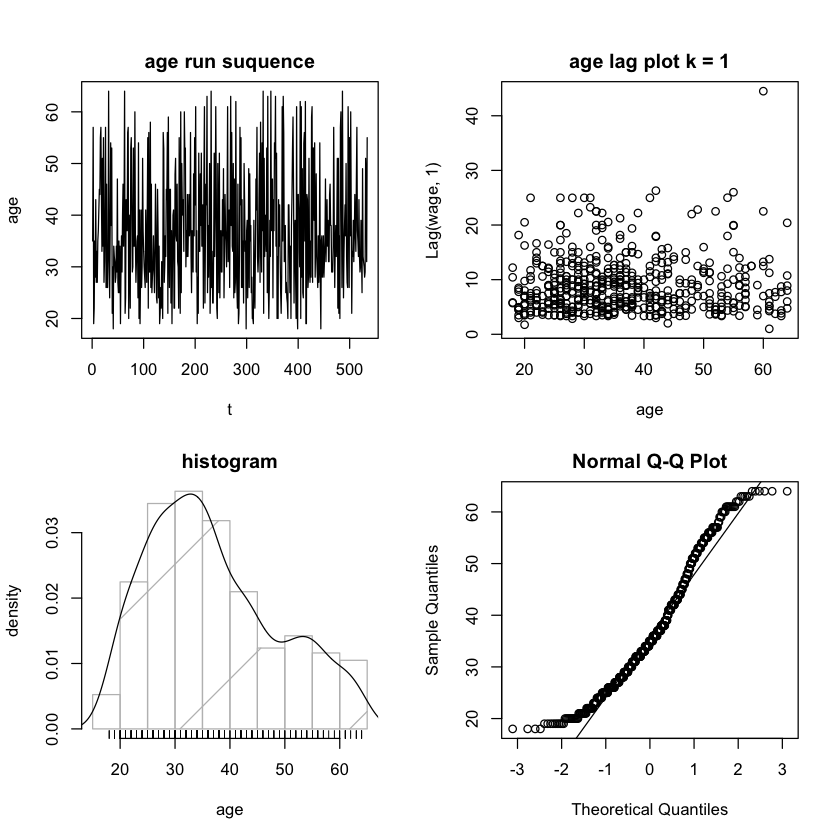

In [51]:

par(mfrow= c(2,2), oma = c(0, 0 , 2, 0), mar = c(5.1, 4.1, 2.1, 2.1))
plot(t, age, type = 'l', main = "age run suquence")
plot(age, Lag(wage, 1), main = "age lag plot k = 1")
truehist(age, nbins = "FD", col= "grey", main = "histogram", density = TRUE,ylab = "density")
lines(density(age, adjust = 0.9), lwd = 1)
rug(age)
qqnorm(age)
qqline(age)


In [52]:
shapiro.test(age)


	Shapiro-Wilk normality test

data:  age
W = 0.9523, p-value = 4.117e-12


### four plot for experience

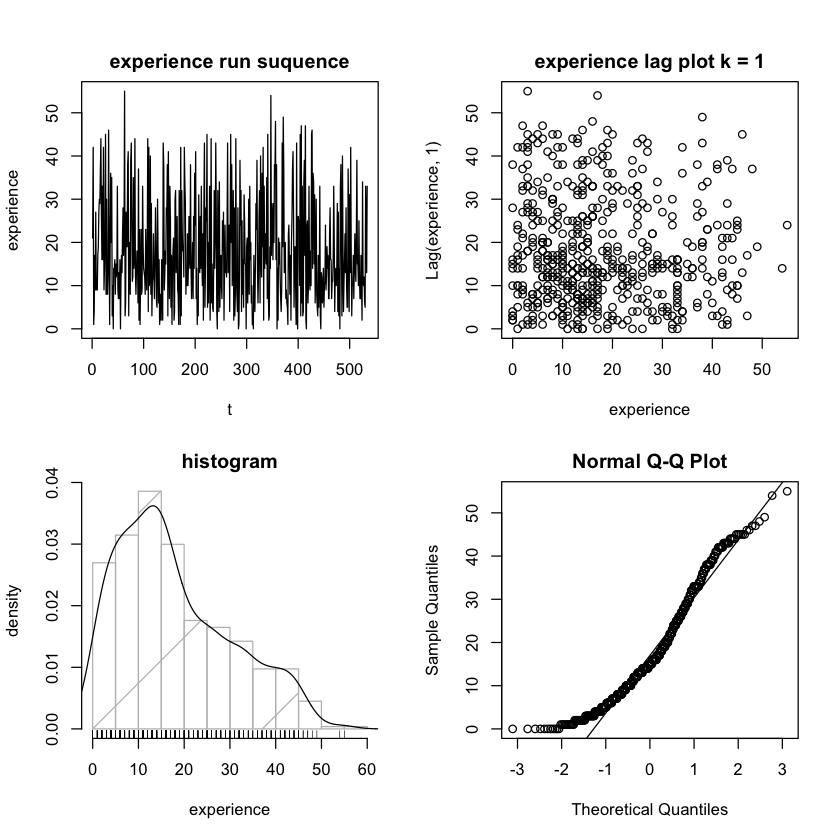

In [53]:

par(mfrow= c(2,2), oma = c(0, 0 , 2, 0), mar = c(5.1, 4.1, 2.1, 2.1))
plot(t, experience, type = 'l', main = "experience run suquence")
plot(experience, Lag(experience, 1), main = "experience lag plot k = 1")
truehist(experience, nbins = "FD", col= "grey", main = "histogram", density = TRUE,ylab = "density")
lines(density(experience, adjust = 0.9), lwd = 1)
rug(experience)
qqnorm(experience)
qqline(experience)




In [54]:
### normality test
shapiro.test(experience)


	Shapiro-Wilk normality test

data:  experience
W = 0.94006, p-value = 7.603e-14


## (b), (c)

### from the qqnorm plot and histogram and shapiro statistics above we can see that wage is the least normal distribution like variable. age and experience have some similarity with normal distribution. So I generate the confidence interval for age and experience and test qqplot with exponential distribution on wage. It turned out that wage follows exponential distribution well.

In [55]:

# conf.int for age
avg=mean(age)
stdev=sd(age)
n=length(age) 
error=qnorm(.975)*stdev/sqrt(n)
lowerCI=avg-error
upperCI=avg+error
print(sprintf("confidence interval for age = (%f, %f)", lowerCI, upperCI))





[1] "confidence interval for age = (35.838733, 37.827934)"


In [56]:
# conf.int for experience
avg=mean(experience)
stdev=sd(experience)
n=length(experience)
error=qnorm(.975)*stdev/sqrt(n)
lowerCI=avg-error
upperCI=avg+error
print(sprintf("confidence interval for experience = (%f, %f)", lowerCI, upperCI))

[1] "confidence interval for experience = (16.772101, 18.872094)"


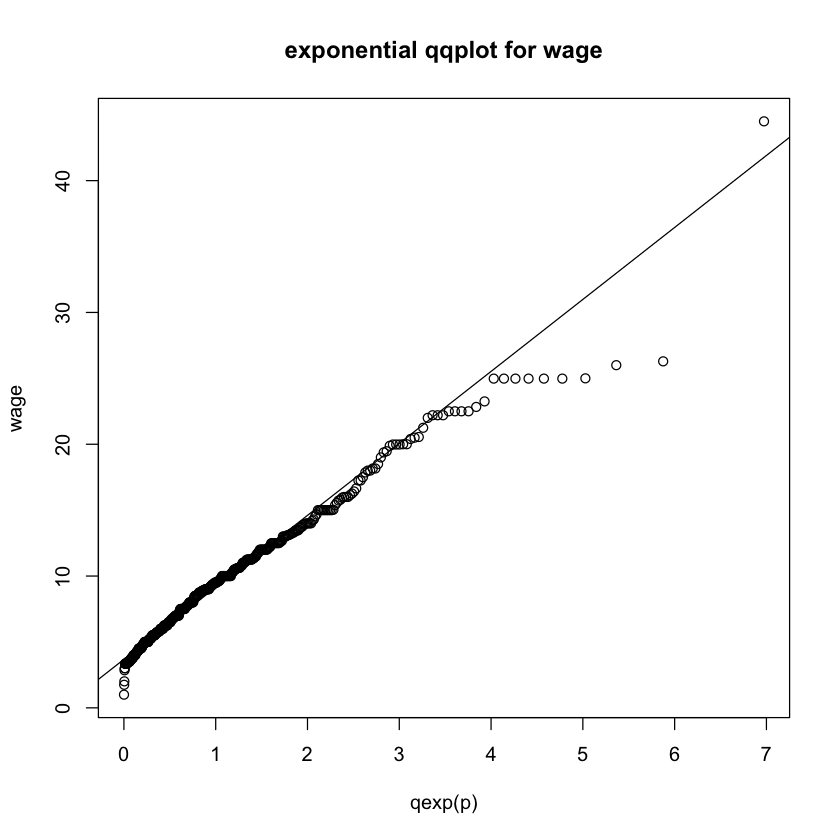

In [57]:
# wage seems fit in exponential distribution
p = ppoints(n)
qqplot(qexp(p), wage, main = "exponential qqplot for wage")
qqline(wage, distribution = qexp)

## (d)

### gender vs wage -- t.test
### pvalue is very small which indicates there is significant wage difference between sex.

In [58]:
with(Wages, t.test(wage~sex))


	Welch Two Sample t-test

data:  wage by sex
t = 4.8853, df = 530.55, p-value = 1.369e-06
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 1.265164 2.966949
sample estimates:
mean in group 0 mean in group 1 
       9.994913        7.878857 


### plot histogram for sex == 1 or sex == 0 but which is not sufficient to determine if there is wage difference.
### so I decided to construct permutation test and visualize it by histogram.

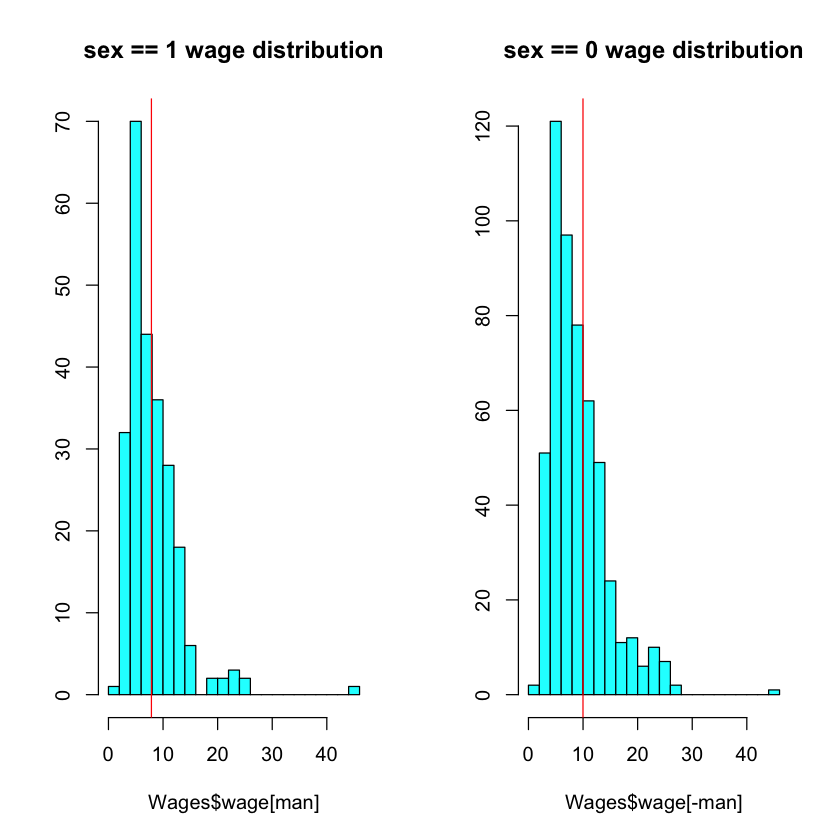

In [59]:
par(mfrow= c(1,2))
man = Wages$sex == 1
truehist(Wages$wage[man], nbins = "FD", main = "sex == 1 wage distribution",prob = FALSE)
abline(v = 7.87, col = "red")
truehist(Wages$wage[-man], nbins = "FD", main = "sex == 0 wage distribution", prob = FALSE)
abline(v = 9.99, col = "red")



### construct permutation distribution of the difference in mean.
### the blue line is the location of observation (mean wage difference) in null hypothesis

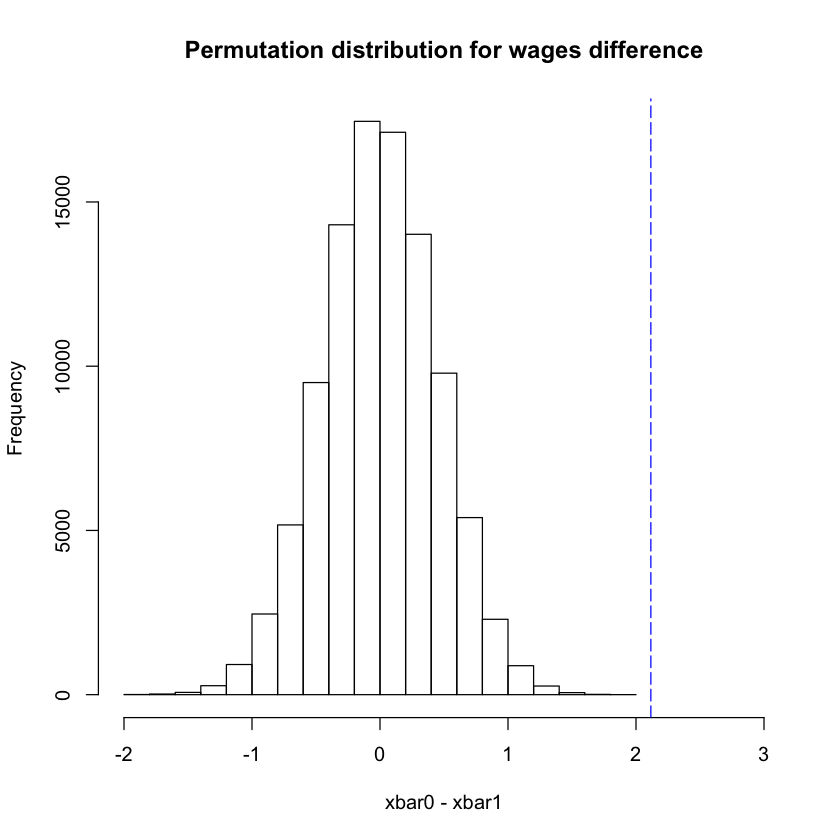

In [60]:
observed <- 9.9949 - 7.8788 # 0 - 1

#set.seed(0)
B <- 10^5-1  #set number of times to repeat this process
 result <- numeric(B) # space to save the random differences
 for(i in 1:B)
  {
  index <- sample(n, size= 289, replace = FALSE) # sample of numbers
  result[i] <- mean(wage[index]) - mean(wage[-index])
}

##Plot

hist(result, xlab = "xbar0 - xbar1", main="Permutation distribution for wages difference", xlim = c(-2,3))
abline(v = observed, col = "blue", lty=5)






### according to the p value, we conclude that there is significant wage difference in sex. Results from the t-test confirm the view from the visualization.

In [61]:
pv = ((sum(result >= observed)+1)/(B + 1)) * 2 # p-value
print(sprintf("p value for permutation is %f", pv))

[1] "p value for permutation is 0.000020"


# part 2
## load data

In [62]:
U = read.table(file = "./UFD.txt")
Unew = c(U$V1,U$V2,U$V3,U$V4,U$V5)


N = read.table(file = "./NFD.txt")
Nnew = c(N$V1,N$V2,N$V3,N$V4,N$V5)



## UFD.txt

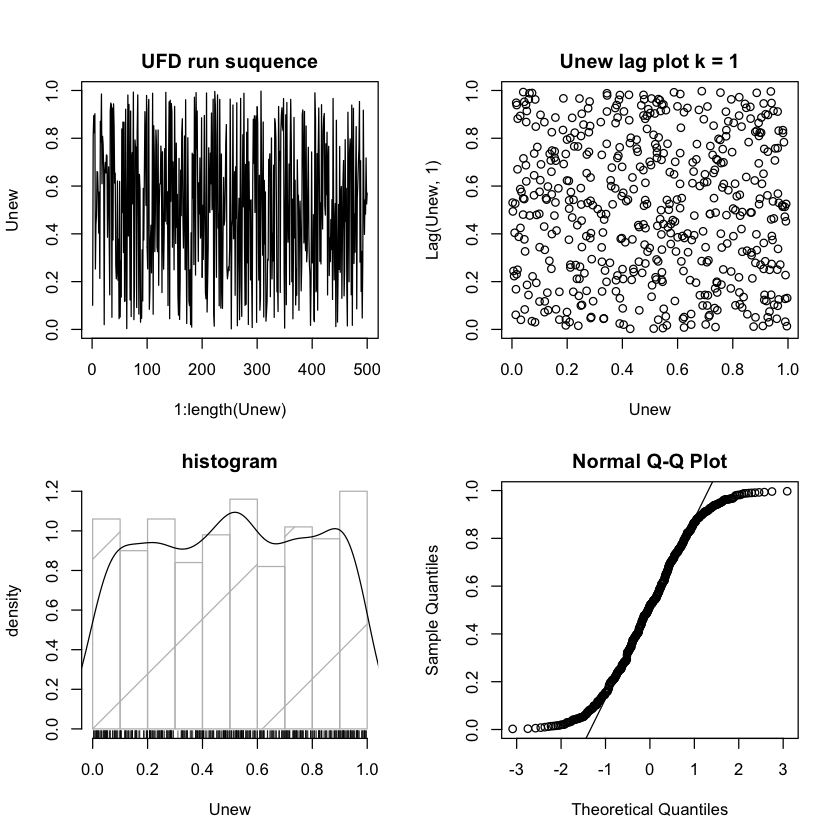

In [63]:


par(mfrow= c(2,2), oma = c(0, 0 , 2, 0), mar = c(5.1, 4.1, 2.1, 2.1))
plot(1:length(Unew), Unew, type = 'l', main = "UFD run suquence")
plot(Unew, Lag(Unew, 1), main = "Unew lag plot k = 1")
truehist( Unew, nbins = "FD", col= "grey", main = "histogram", density = TRUE,ylab = "density")
lines(density(Unew, adjust = 0.9), lwd = 1)
rug(Unew)
qqnorm(Unew)
qqline(Unew)




### data = UFD and it is not normal distributed. From the hist plot , it looks like uinform
### try uniform qqplot


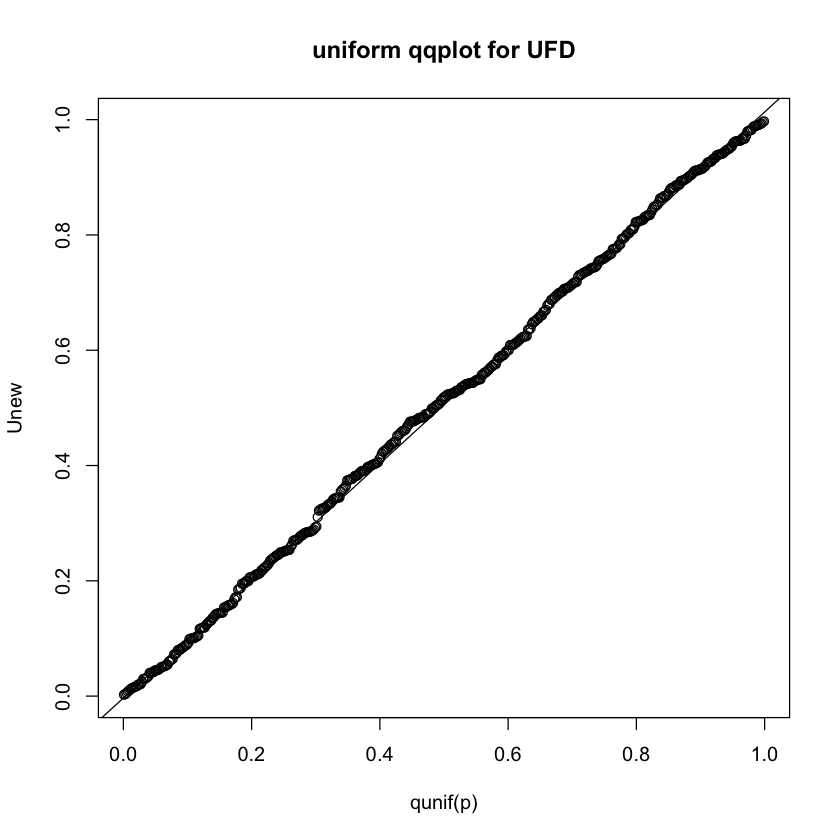

In [64]:
p = ppoints(length(Unew))
qqplot(qunif(p), Unew, main = "uniform qqplot for UFD")
qqline(Unew, distribution= qunif)

### the qqplot justify that it is uniformly distributed

## NFD.txt
## it is normal distributed, justified by histogram and qqnorm plot.

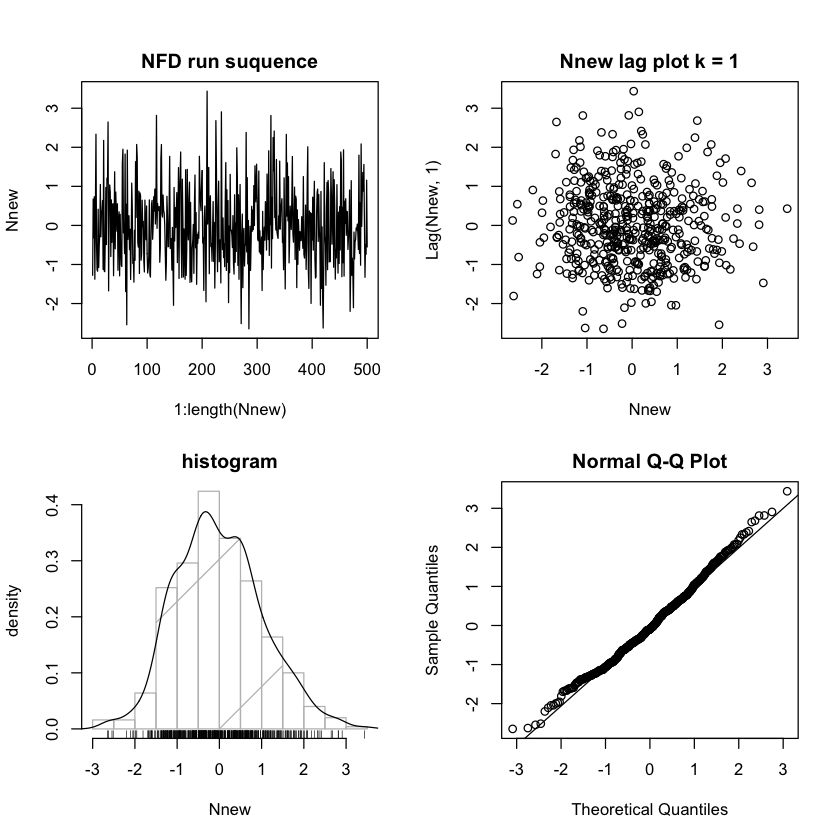

In [65]:

par(mfrow= c(2,2), oma = c(0, 0 , 2, 0), mar = c(5.1, 4.1, 2.1, 2.1))
plot(1:length(Nnew), Nnew, type = 'l', main = "NFD run suquence")
plot(Nnew, Lag(Nnew, 1), main = "Nnew lag plot k = 1")
truehist( Nnew, nbins = "FD", col= "grey", main = "histogram", density = TRUE,ylab = "density")
lines(density(Nnew, adjust = 0.9), lwd = 1)
rug(Nnew)
qqnorm(Nnew)
qqline(Nnew)
